 # Car Accident Severity
 # Coursera Capstone Project car accident severity


## 1. Introduction
### 1.1 Background

With increase in population as well as urbanization we can also see the increase in number of road travel which finally leads to accidents.As most of the people prefers the road ways as the mode of transportation their chances of getting into accidents also increases.Therefore developing the system that is capable of predicting the probability of getting into accidents as well as the type of severity based on the data provided will help many to escape and handle the situations properly.

### 1.2 Business Problem:
    1. Many people lose their lives while driving either by four wheelers or two wheelers just because they dont take precautions or don’t have information about the weather condition or the road condition or any external factors.
    2. In some cases the hospitals are not always ready for sudden new patients, so using this predictions we can make the hospitals be prepared for such cases.
    3. Another problem is traffic officers or any other security services can be alarmed to monitor the locations where more accidents are likely to occur.
    4. Often people get confused when more number of options are avaliable to travle from source to destinations and in many cases they choose the one with short distance which may not be the safest way to travle.
    5. Better if insrance is covered for the vehicle used to travel. 

Hence this project will be predicting the severity of the accidents that are likely to happen which aims help the target audiance who are 
    • People likely to travel in strange weathers.
    • Police,governments,traffic officers 
    • Hospitals
    • Vehicle insurance companies
and to solve the above mentioned common problems.

## 2. DATA
The data source for this project : https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

The data in initial stage contains 37 features out of which we will be using only the effective 13 features.

### 2.1 FEATURES USED
The following factors are used to solve this problem:-

LOCATION 		: Description of the general location of the collision

SEVERITYCODE  	:1 – Prop Damage , 2 – Injury (Target variable)

COLLISIONTYPE 	:Collision type

PERSONCOUNT   	:Total number of people involved in the collision

PEDCOUNT        :Total number of pedestrians involved in the collision

PEDCYLCOUNT     :Total number of bicycles involved in the collision

VEHCOUNT        :Total number of vehicles involved in the collision

WEATHER        	:Weather conditions

ROADCOND		:Road Conditions

LIGHTCOND		:Light Conditions

SPEEDING 		:Wheather speeding was cause for accident

JUNCTIONTYPE	:Type of Junction where accident occured.

UNDERINFL		:Either driver was under drug or alcohol influence.

### 2.2 Explanation how data can help the prediction:

    1. Starting with the main factors which are weeather condition,road condition,light condition all three can be considered we effective features for the predicting the severity.
    2. Collision type and junction type describes which type of collision are more likely cause severity
    3. Vehicle,bicycles,pedestrian count aslo affects prediction as more traffic can cause high probability for accidents.
    4. Information about whether the driver was under drug or alcohol consumption while driving can warn the other drivers before their travel.
    5. Location data can give alternate travel route if their prefered route is more likely to get into accidents.
    

## Methodology

As this project deals with analysisng and predicting the severity and possibility of getting into accident , this can be clearly stated that this is a classification problem.

So according to the general principle of data science the necessary exploratory data analysis and the appropriate machine learning models which are suitable for classification problem shall be used in this project.

For analysing the data, different graphs were created to interpret how different features affect the severity code which is the target in this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
from IPython.display import Image

In [2]:
#Loading dataset
df = pd.read_csv("dataset/transformed_data.csv")

In [3]:
df.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,UNDERINFL,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
0,Angles,Overcast,Wet,Daylight,At Intersection (intersection related),No,No,2,2,0,0,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),No,No,1,2,0,0,2
2,Parked Car,Overcast,Dry,Daylight,Mid-Block (not related to intersection),No,No,1,4,0,0,3
3,Other,Clear,Dry,Daylight,Mid-Block (not related to intersection),No,No,1,3,0,0,3
4,Angles,Raining,Wet,Daylight,At Intersection (intersection related),No,No,2,2,0,0,2


Text(0, 0.5, 'Total cases')

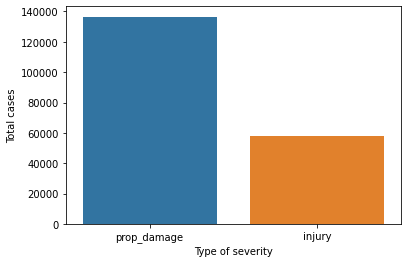

In [4]:
#which severity is most
prop_damage = df[df["SEVERITYCODE"]==1.0]["SEVERITYCODE"].value_counts()
injury = df[df["SEVERITYCODE"]==2.0]["SEVERITYCODE"].value_counts()
sns.barplot(x=["prop_damage","injury"],y=[prop_damage,injury])
plt.xlabel("Type of severity")
plt.ylabel("Total cases")

In [5]:
injury

2    58188
Name: SEVERITYCODE, dtype: int64

Text(11.625, 0.5, 'Total cases for property damage')

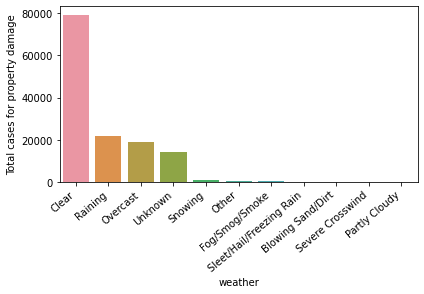

In [6]:
#which weather affects severity
weather_with_propdmg = df[df["SEVERITYCODE"]==1.0]["WEATHER"].value_counts()


ax = sns.barplot(x=weather_with_propdmg.index,y=weather_with_propdmg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel("weather")
plt.ylabel("Total cases for property damage")


Text(11.5, 0.5, 'Total cases for injury')

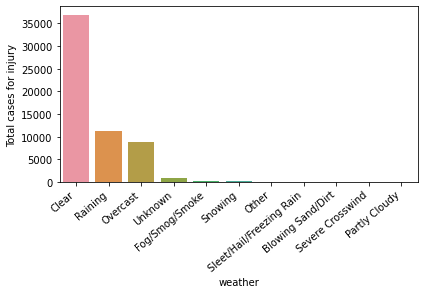

In [7]:
weather_with_injury = df[df["SEVERITYCODE"]==2.0]["WEATHER"].value_counts()

ax = sns.barplot(x=weather_with_injury.index,y=weather_with_injury)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel("weather")
plt.ylabel("Total cases for injury")


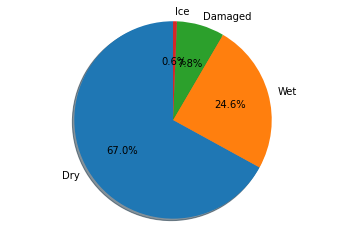

Dry        66.533109
Wet        24.386535
Damaged     7.745296
Ice         0.621041
Name: ROADCOND, dtype: float64

In [8]:
#how road condition affects

rd=((df["ROADCOND"].value_counts())/194673*100).nlargest(n=4,keep="first")

fig1, ax1 = plt.subplots()
ax1.pie(rd, labels=rd.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
rd

Dry        88398
Wet        31719
Damaged    14329
Ice          936
Name: ROADCOND, dtype: int64
Dry        41124
Wet        15755
Damaged      749
Ice          273
Name: ROADCOND, dtype: int64


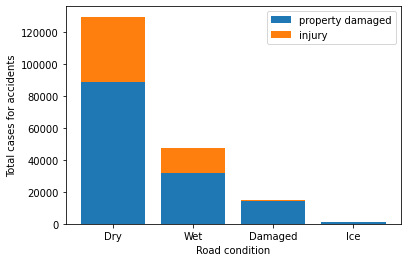

In [9]:
rd_1=df[df["SEVERITYCODE"]==1.0]["ROADCOND"].value_counts().nlargest(n=4,keep="first")
rd_2=df[df["SEVERITYCODE"]==2.0]["ROADCOND"].value_counts().nlargest(n=4,keep="first")

print(rd_1)
print(rd_2)

plt1 = plt.bar(rd_1.index,rd_1)
plt2 =plt.bar(rd_2.index,rd_2,bottom=rd_1)
plt.legend((plt1[0], plt2[0]), ('property damaged', 'injury'))
plt.xlabel("Road condition")
plt.ylabel("Total cases for accidents")
plt.show()

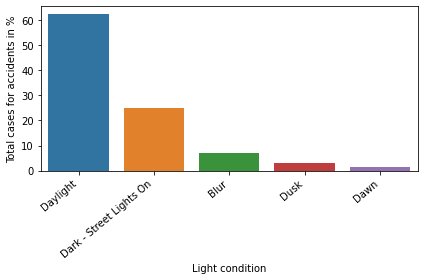

In [10]:
#for light condition
ld=((df["LIGHTCOND"].value_counts())/194673*100).nlargest(n=5,keep="first")

ax = sns.barplot(x=ld.index,y=ld)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Light condition")
plt.ylabel("Total cases for accidents in %")
plt.tight_layout()

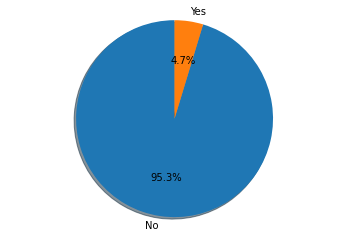

In [11]:
#drug influence
dd=(df["UNDERINFL"].value_counts())/194673*100

fig1, ax1 = plt.subplots()
ax1.pie(dd, labels=dd.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

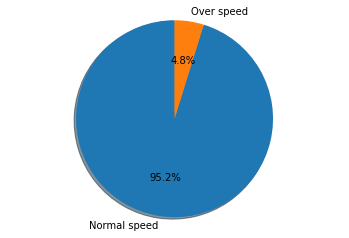

In [12]:
#Speeding
dd=(df["SPEEDING"].value_counts())/194673*100
dd.index=["Normal speed","Over speed"]
fig1, ax1 = plt.subplots()
ax1.pie(dd, labels=dd.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

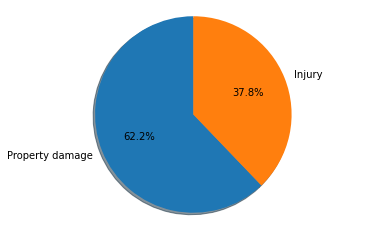

In [13]:
dty = (df[df["SPEEDING"]=='Yes']["SEVERITYCODE"].value_counts())/9333*100

dty.index=["Property damage","Injury"]

fig1, ax1 = plt.subplots(1,1)
ax1.pie(dty, labels=dty.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


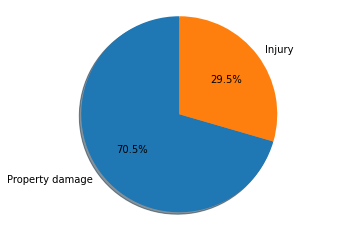

In [14]:
dtn = (df[df["SPEEDING"]=='No']["SEVERITYCODE"].value_counts())/185340*100
dtn.index=["Property damage","Injury"]

fig1, ax1 = plt.subplots(1,1)
ax1.pie(dtn, labels=dtn.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

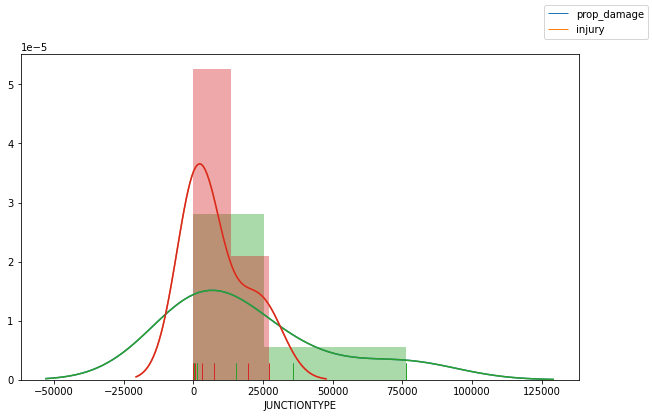

In [15]:
#junction type

# Sort the dataframe by target
prop_damage = df.loc[df["SEVERITYCODE"] == 1.0]["JUNCTIONTYPE"].value_counts()
injury = df.loc[df["SEVERITYCODE"] == 2.0]["JUNCTIONTYPE"].value_counts()

fig = plt.figure(figsize=(10,6))
sns.distplot(prop_damage, hist=False, rug=True)
sns.distplot(injury, hist=False, rug=True)
sns.distplot(prop_damage, hist=True, rug=True)
sns.distplot(injury, hist=True, rug=True)
fig.legend(labels=['prop_damage','injury'])


Text(0, 0.5, 'Total cases for injury cases')

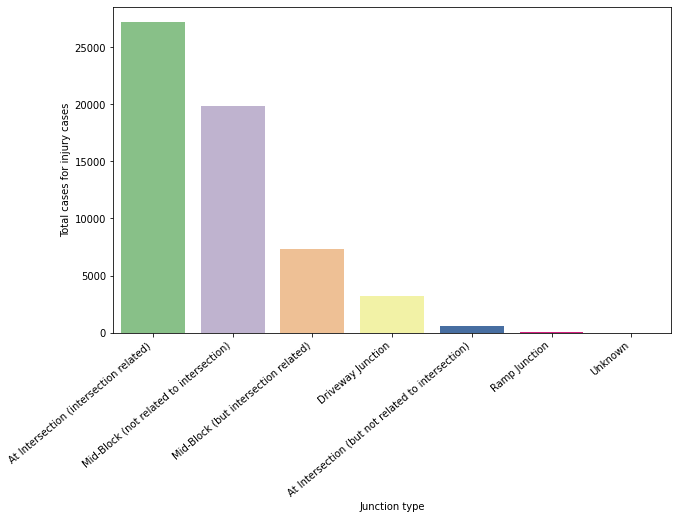

In [16]:
fig = plt.figure(figsize=(10,6))
ax=sns.barplot(x=injury.index,y=injury,palette="Accent")
#sns.barplot(x=injury.index,y=injury)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Junction type")
plt.ylabel("Total cases for injury cases")

In [17]:
Image(url="https://www.lvpersonalinjurylawyers.com/wp-content/uploads/2019/10/intersection-accident-lawyers.jpg")

In [18]:
#for counts

feature =["PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT"]
dc_p={}
for col in feature:
    dc_p[col] =[df[df["SEVERITYCODE"]==1.0][col].sum(),"prop_damage"]

dc_i={}
for col in feature:
    dc_i[col] =[df[df["SEVERITYCODE"]==2.0][col].sum(),"injury"]
    
dcp=pd.DataFrame(columns=["category","totalcount","severity"])
dcp["category"]=list(dc_p.keys())
dcp["totalcount"]=[list(dc_p.values())[i][0] for i in range(0,4)]
dcp["severity"]=[list(dc_p.values())[i][1] for i in range(0,4)]
dcp

dci=pd.DataFrame(columns=["category","totalcount","severity"])
dci["category"]=list(dc_i.keys())
dci["totalcount"]=[list(dc_i.values())[i][0] for i in range(0,4)]
dci["severity"]=[list(dc_i.values())[i][1] for i in range(0,4)]
dci
final=pd.concat([dcp,dci])
final

,category,totalcount,severity
0,PERSONCOUNT,317921,prop_damage
1,PEDCOUNT,719,prop_damage
2,PEDCYLCOUNT,679,prop_damage
3,VEHCOUNT,265233,prop_damage
0,PERSONCOUNT,157943,injury
1,PEDCOUNT,6511,injury
2,PEDCYLCOUNT,4848,injury
3,VEHCOUNT,108691,injury


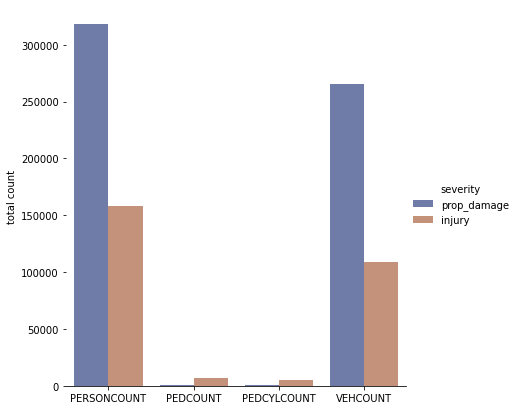

In [19]:
g = sns.catplot(
    data=final, kind="bar",
    x="category", y="totalcount", hue="severity",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "total count")

In [20]:
corr_matrix = df.corr(method="pearson")

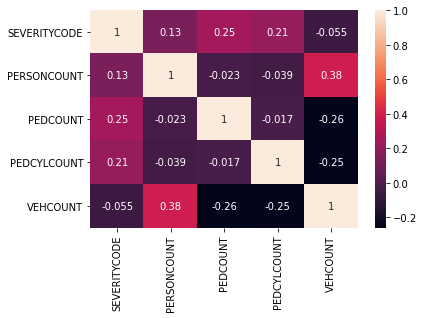

In [21]:
sns.heatmap(corr_matrix,annot=True)

In [22]:
#converting object type to int or float
'''from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

    plt.figure(figsize=(20,10))
corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix,annot=True)'''

'from sklearn.preprocessing import LabelEncoder\n\nle=LabelEncoder()\nfor col in df.columns:\n    df[col] = le.fit_transform(df[col])\n\n    plt.figure(figsize=(20,10))\ncorr_matrix = df.corr(method="pearson")\nsns.heatmap(corr_matrix,annot=True)'

Text(0, 0.5, 'Total cases for cases')

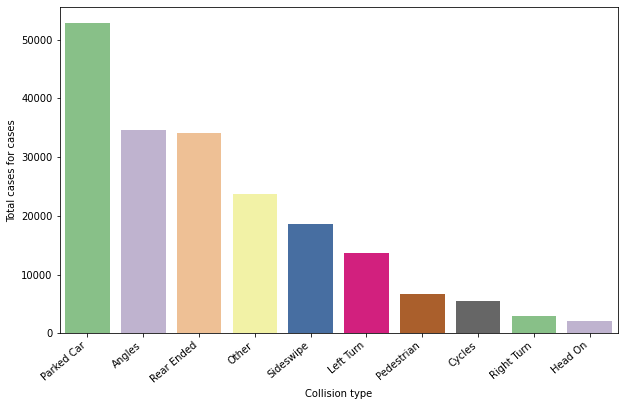

In [23]:
ct = df["COLLISIONTYPE"].value_counts()

fig = plt.figure(figsize=(10,6))
ax=sns.barplot(x=ct.index,y=ct,palette="Accent")
#sns.barplot(x=injury.index,y=injury)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Collision type")
plt.ylabel("Total cases for cases")

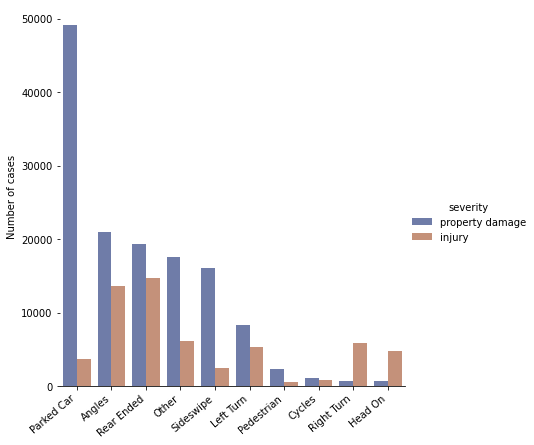

In [32]:
ctp = df[df["SEVERITYCODE"]==1.0]["COLLISIONTYPE"].value_counts().to_frame()
cti = df[df["SEVERITYCODE"]==2.0]["COLLISIONTYPE"].value_counts().to_frame()
ctp.rename(columns = {'COLLISIONTYPE':'Count'}, inplace = True) 
ctp["severity"]="property damage"
cti.rename(columns = {'COLLISIONTYPE':'Count'}, inplace = True) 
cti["severity"]="injury"
final=pd.concat([ctp,cti])
final["category"]=final.index
g = sns.catplot(
    data=final, kind="bar",
    x="category", y="Count", hue="severity",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.despine(left=True)
g.set_axis_labels("", "Number of cases")

In [28]:
final

,Count,severity
Parked Car,49188,property damage
Angles,21050,property damage
Rear Ended,19419,property damage
Other,17591,property damage
Sideswipe,16103,property damage
Left Turn,8292,property damage
Right Turn,2347,property damage
Head On,1152,property damage
Pedestrian,672,property damage
Cycles,671,property damage


In [ ]:
ctp